# Assignment 6 - Optimization Methods
## Matteo Ghilardini
---

### Part 3: programming problem

#### Setup the environment:

Install the required libraries in the jupiter notebook environment:

In [40]:
pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Import all the required libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#### **Problem 1** (Active constraints)

##### 1.

In [42]:
def is_c1_verified(x):
    x1, x2 = x
    return x1 + x2 >= 3

def is_c2_verified(x):
    x1, x2 = x
    return x1 + 2 * x2 <= 6

def is_c3_verified(x):
    x1, x2 = x
    return x1 >= 1

def is_c4_verified(x):
    x1, x2 = x
    return x2 >= 1

##### 2.

In [43]:
def is_feasible(x):
    return (is_c1_verified(x) and
            is_c2_verified(x) and
            is_c3_verified(x) and
            is_c4_verified(x))

##### 3.

In [44]:
x0 = np.array([1, 2])
x1 = np.array([3, 1.2])

print("Feasible region for x^0=",x0, is_feasible((1, 2)))
print("Feasible region for x^1=",x1, is_feasible((3, 1.2)))

Feasible region for x^0= [1 2] True
Feasible region for x^1= [3.  1.2] True


##### 4.

I use function `np.isclose()` to check equality that involves floating-point numbers since direct comparisons like x == y can fail.

In [45]:
def is_c1_active(x):
    x1, x2 = x
    return np.isclose(x1 + x2, 3)
def is_c2_active(x):
    x1, x2 = x
    return np.isclose(x1 + 2 * x2, 6)
def is_c3_active(x):
    x1, x2 = x
    return np.isclose(x1, 1)
def is_c4_active(x):
    x1, x2 = x
    return np.isclose(x2, 1)

##### 5.

In [46]:
print("For x^0=",x0)
print("\tc1=",is_c1_active(x0))
print("\tc2=",is_c2_active(x0))
print("\tc3=",is_c3_active(x0))
print("\tc4=",is_c4_active(x0))

print("For x^1=",x1)
print("\tc1=",is_c1_active(x1))
print("\tc2=",is_c2_active(x1))
print("\tc3=",is_c3_active(x1))
print("\tc4=",is_c4_active(x1))

For x^0= [1 2]
	c1= True
	c2= False
	c3= True
	c4= False
For x^1= [3.  1.2]
	c1= False
	c2= False
	c3= False
	c4= False


##### 6.

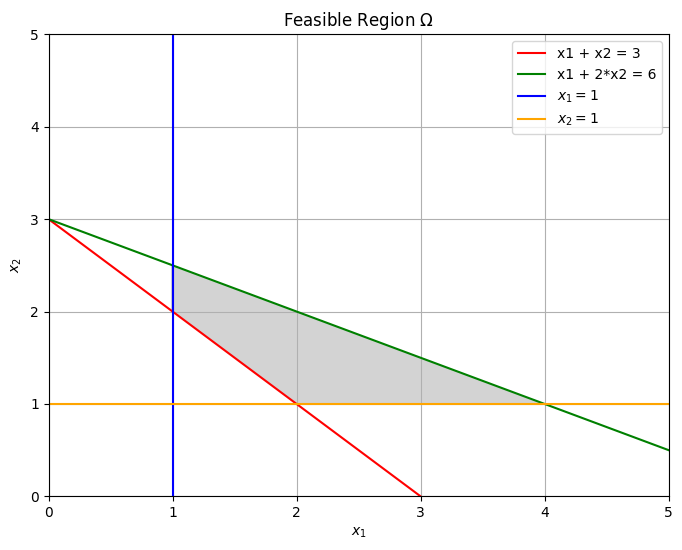

In [51]:
x1_vals = np.linspace(0, 5, 300)
x2_vals = np.linspace(0, 5, 300)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Check feasibility at each grid point
feasible_mask = np.zeros_like(X1, dtype=bool)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        point = (X1[i, j], X2[i, j])
        feasible_mask[i, j] = is_feasible(point)

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightgray"])

# Plot constraint boundaries
x = np.linspace(0, 5, 400)
plt.plot(x, 3 - x, 'r-', label='x1 + x2 = 3')
plt.plot(x, (6 - x) / 2, 'g-', label='x1 + 2*x2 = 6')
plt.axvline(1, color='b', linestyle='-', label=r'$x_1 = 1$')
plt.axhline(1, color='orange', linestyle='-', label=r'$x_2 = 1$')

# Labels and formatting
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region $\Omega$')
plt.legend()
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

##### 7.

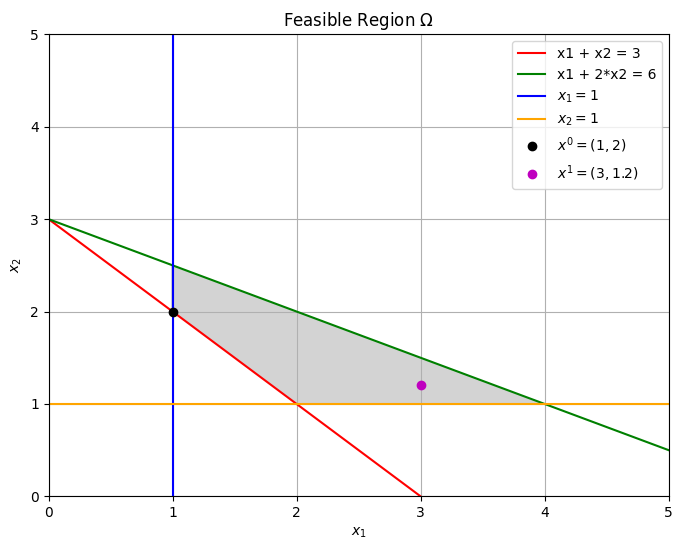

In [62]:
# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightgray"])

# Plot constraint boundaries
x = np.linspace(0, 5, 400)
plt.plot(x, 3 - x, 'r-', label='x1 + x2 = 3')
plt.plot(x, (6 - x) / 2, 'g-', label='x1 + 2*x2 = 6')
plt.axvline(1, color='b', linestyle='-', label=r'$x_1 = 1$')
plt.axhline(1, color='orange', linestyle='-', label=r'$x_2 = 1$')

# Plot points x0 and x1
plt.plot(x0[0], x0[1], 'ko', label=r'$x^0 = (1, 2)$')
plt.plot(x1[0], x1[1], 'mo', label=r'$x^1 = (3, 1.2)$')

# Labels and formatting
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region $\Omega$')
plt.legend()
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

##### 8.


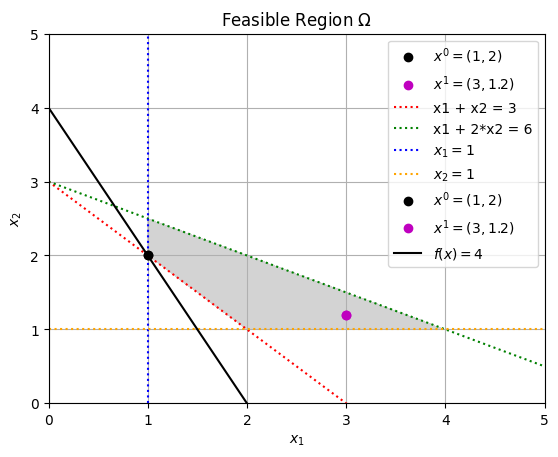

In [72]:
# Feasible region
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightblue"])

# Add x^0 and x^1
x0 = (1, 2)
x1_ = (3, 1.2)
plt.plot(x0[0], x0[1], 'ko', label=r'$x^0 = (1, 2)$')
plt.plot(x1_[0], x1_[1], 'mo', label=r'$x^1 = (3, 1.2)$')

# Plot the feasible region
plt.contourf(X1, X2, feasible_mask, levels=[0, 0.5, 1], colors=["white", "lightgray"])

# Plot constraint boundaries
x = np.linspace(0, 5, 400)
plt.plot(x, 3 - x, 'r:', label='x1 + x2 = 3')
plt.plot(x, (6 - x) / 2, 'g:', label='x1 + 2*x2 = 6')
plt.axvline(1, color='b', linestyle=':', label=r'$x_1 = 1$')
plt.axhline(1, color='orange', linestyle=':', label=r'$x_2 = 1$')

# Plot points x0 and x1
plt.plot(x0[0], x0[1], 'ko', label=r'$x^0 = (1, 2)$')
plt.plot(x1[0], x1[1], 'mo', label=r'$x^1 = (3, 1.2)$')

# Plot the elvel line f(x) = 4
x1_line = np.linspace(0, 5, 300)
x2_line = 4 - 2 * x1_line
plt.plot(x1_line, x2_line, 'k-', label=r'$f(x) = 4$')

# Labels and formatting
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region $\Omega$')
plt.legend()
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

The objective function is $f(x) = 2x_1 + x_2$, which defines a family of parallel lines $f(x) = b$.  
We plot the level line $f(x) = 4$, i.e., $x_2 = 4 - 2x_1$. This line intersects the feasible region $\Omega$, and specifically passes through the point $x^0 = (1, 2)$, which satisfies all constraints and lies on the boundary of $\Omega$.

Since the objective function is linear and $x^0$ achieves the lowest value of $f(x)$ over the feasible set, we conclude that $x^0$ is the **global minimiser**.


#### **Problem 2** (KKT conditions)

#### **Problem 3** (Feasible directions)